In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Initialise an array of some random integers between 1 and 100
np.random.seed(42)
array1 = np.random.randint(1,100,80)
array1

In [ ]:
array2 = array1*2 +3
array2

In [ ]:
plt.scatter(x=array1,y=array2, c='r')

In [ ]:
X,y=array1,array2

In [ ]:
# Shapes
input_shapes = X.shape
output_shape=y.shape
input_shapes,output_shape

### Convert into tensors

In [ ]:
X=tf.constant(array1)
y=tf.constant(array2)

In [ ]:
X.ndim,y.ndim

### Model 1

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)),
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

history_1 = model_1.fit(X,y, epochs=100)

In [ ]:
y_pred = model_1.predict([10])
y_pred, 2*10+3

### To evaluate a model, we can use some metrices, like
+ 3 Set rule : Dividing the dataset into test, train and validate (for now we can only have train and test)
+ Visualise through a scattrer plot, how much your predictions are away from the actual value
+ We need 3 plots, x_train vs y_train, x_test vs y_test and x_test vs y_pred
+ MAE(mean absolute error) and MSE(mean square error) - `tf.metrices.mean_absolute_error` and `tf.metrices.mean_square_error`

In [ ]:
# Split data into test and train
x_train = X[:65]
y_train = y[:65]
x_test = X[65:]
y_test = y[65:]

In [ ]:
# Defininf a function to plot graph

def plot_predict(train_label_x, train_label_y, test_label_x, test_label_y,predictions):
    plt.figure(figsize=(12,6))
    plt.title("Prediction Plot")
    plt.scatter(train_label_x,train_label_y,c='g',label="Test Data")
    plt.scatter(test_label_x,test_label_y,c="b", label="Train Data")
    plt.scatter(x_test, predictions,c="r", label="Predicted Data")
    plt.show()

def get_mae(test_label_x, predictions):
    return tf.metrics.mean_absolute_error(test_label_x, tf.squeeze(predictions))

def get_mse(test_label_x, predictions):
    return tf.metrics.mean_squared_error(test_label_x, tf.squeeze(predictions))

### Train a model on trainin data

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

history_2 = model_2.fit(x_train, y_train, epochs=100, verbose=0)
history_2

In [ ]:
y_pred = model_2.predict(x_test)
y_pred,x_test

In [ ]:
get_mae(x_test,y_pred), get_mse(x_test,y_pred)

In [ ]:
plot_predict(x_train,y_train,x_test,y_test,y_pred)

In [322]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([

    tf.keras.layers.Dense(1, input_shape=(1,))
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

history_3 = model_3.fit(x_train, y_train, epochs=50)

Epoch 1/50
3/3 [==============================] - 0s 3ms/step - loss: 119.3614 - mae: 119.3614
Epoch 2/50
3/3 [==============================] - 0s 5ms/step - loss: 61.8773 - mae: 61.8773
Epoch 3/50
3/3 [==============================] - 0s 4ms/step - loss: 8.0981 - mae: 8.0981
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 12.5633 - mae: 12.5633
Epoch 5/50
3/3 [==============================] - 0s 4ms/step - loss: 14.1324 - mae: 14.1324
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 12.8794 - mae: 12.8794
Epoch 7/50
3/3 [==============================] - 0s 4ms/step - loss: 12.1169 - mae: 12.1169
Epoch 8/50
3/3 [==============================] - 0s 4ms/step - loss: 13.5549 - mae: 13.5549
Epoch 9/50
3/3 [==============================] - 0s 4ms/step - loss: 13.3567 - mae: 13.3567
Epoch 10/50
3/3 [==============================] - 0s 3ms/step - loss: 12.5261 - mae: 12.5261
Epoch 11/50
3/3 [==============================] - 0s 2ms/step - loss

<AxesSubplot:>

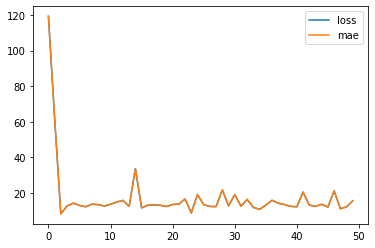

In [323]:
pd.DataFrame(history_3.history).plot()

In [324]:

y_pred= model_3.predict(x_test)
y_pred.shape,x_test.shape


1/1 [==============================] - 0s 43ms/step


((15, 1), TensorShape([15]))

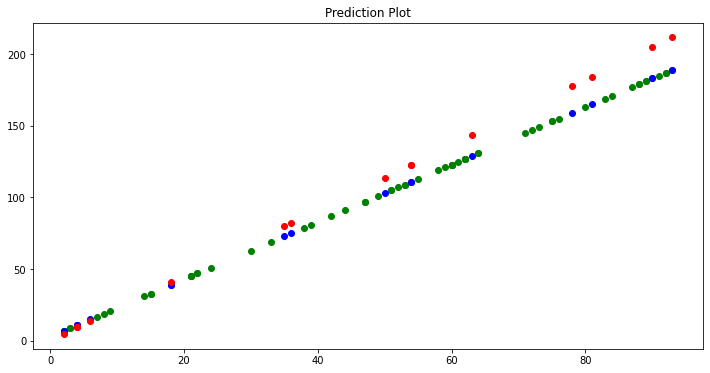

In [325]:
plot_predict(x_train,y_train,x_test,y_test,tf.squeeze(y_pred))

In [326]:
get_mae(x_test, y_pred), get_mse(x_test, y_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=56.932144>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4844.9863>)